## Read and Clean data

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
sales = pd.read_csv("data.csv", usecols=[
    "Product ID",
    "Product Name",
    "Cathegorie",
    "Product Type",
    "Regions",
    "Where",
    "Additional service ",
    "Unit price ",
    "Sales",
    "Quantity",
    "Sales Last Year",
    "Views",
    "Views Last Year",
    "Quantity Last Year",
    "duration"
])

def sanitize_numbers(df):
    return pd.to_numeric(df.str.replace('Rs.||\s|€|-','', regex=True).str.replace(',', '.')).replace(np.nan, 0)

sales = sales.rename(columns={
    "Unit price ": "Price",
    "Product Name": "Name",
    "Product ID": "Id",
    "Regions": "Region",
    "Cathegorie": "Category",
    "Product Type": "Type",
    "Where": "Location",
    "duration": "Duration",
    "Additional service ": "Additional Service"
})

sales["Price"] = sanitize_numbers(sales["Price"])
sales["Sales"] = sanitize_numbers(sales["Sales"])
sales["Sales Last Year"] = sanitize_numbers(sales["Sales Last Year"])
sales["Views"] = sanitize_numbers(sales["Views"])
sales["Views Last Year"] = sanitize_numbers(sales["Views Last Year"])
sales["Views Last Year"] = sales["Views Last Year"]
sales["Quantity"] = sanitize_numbers(sales["Quantity"])
sales["Quantity Last Year"] = sanitize_numbers(sales["Quantity Last Year"])
sales["Name"] = sales["Name"].astype("string")
sales["Category"] = sales["Category"].astype("category")
sales["Type"] = sales["Type"].astype("string")
sales["Region"] = sales["Region"].astype("string")
sales["Location"] = sales["Location"].astype("string")
sales["Additional Service"] = sales["Additional Service"].astype("string")

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Category            479 non-null    category
 1   Id                  479 non-null    int64   
 2   Name                479 non-null    string  
 3   Type                478 non-null    string  
 4   Additional Service  110 non-null    string  
 5   Region              479 non-null    string  
 6   Location            479 non-null    string  
 7   Duration            289 non-null    float64 
 8   Price               479 non-null    float64 
 9   Sales               479 non-null    float64 
 10  Views               479 non-null    float64 
 11  Quantity            479 non-null    float64 
 12  Sales Last Year     479 non-null    float64 
 13  Views Last Year     479 non-null    float64 
 14  Quantity Last Year  479 non-null    float64 
dtypes: category(1), float64(8), int64(1), st


## Basic description

In [81]:
sales.describe(exclude=["int64", "string", "category"])

,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
count,289.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,39.010381,371.962630,3417.973486,631.177453,17.139875,1733.129958,606.592902,9.200418
std,21.668667,633.333879,17987.235829,3104.479209,87.996216,9544.780526,3427.975840,52.401467
min,10.000000,29.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,154.450000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,215.900000,221.550000,82.000000,1.000000,0.000000,42.000000,0.000000
75%,60.000000,359.400000,1098.940000,296.500000,6.000000,457.665000,295.500000,2.000000
max,150.000000,7531.900000,227698.100000,56225.000000,1519.000000,130537.920000,61171.000000,871.000000


# Analysis

## --- Categories ---

### Categories Weight in last year's Sales


Category
Astronaute                        0.00
montgolfière / ballon             0.00
simulateur de chute libre         0.00
Simulateur de vol              1914.75
avion de chasse                9082.83
ULM                           60566.50
Avion                         83980.33
Hélicoptère                  171365.51
montgolfière                 503259.33
Name: Sales Last Year, dtype: float64


Text(0.5, 1.0, 'Category repartition in Last Year Sales')

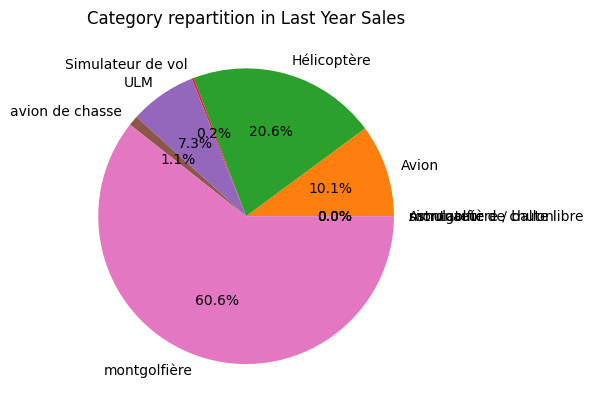

In [82]:
sales_by_category = sales.groupby("Category")["Sales"].sum()
sales_by_category_last_year = sales.groupby("Category")["Sales Last Year"].sum()
categories = sales_by_category.keys()

print(sales_by_category_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_category_last_year, labels=sales_by_category_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Category repartition in Last Year Sales")


### Categories Weight in this years sales



Category
Astronaute                         0.00
montgolfière / ballon              0.00
simulateur de chute libre          0.00
Simulateur de vol               3379.95
avion de chasse                 8937.02
Avion                          73772.90
ULM                            91299.87
Hélicoptère                   230993.12
montgolfière                 1228826.44
Name: Sales, dtype: float64


Text(0.5, 1.0, 'Category repartition in This Year Sales')

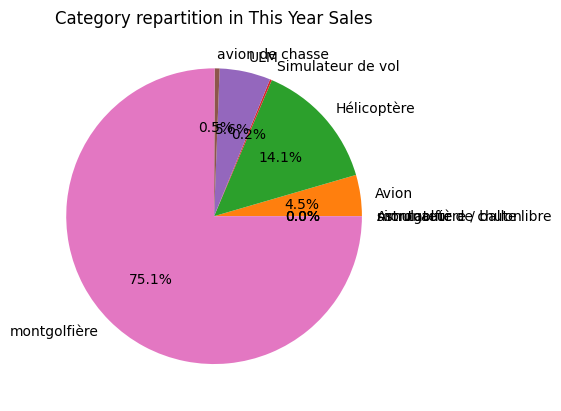

In [83]:
print(sales_by_category.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_category, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in This Year Sales")

### Sales evolution by Category

Text(0.5, 1.0, 'Sales (in euros) by Category by Year')

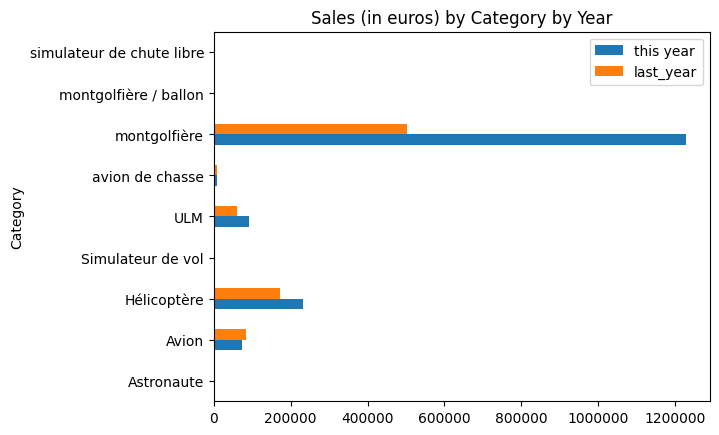

In [84]:
from matplotlib.ticker import FormatStrFormatter

df = pd.DataFrame({"this year": sales_by_category, "last_year":sales_by_category_last_year}, index=categories)
ax = df.plot.barh()
ax.xaxis.set_major_formatter(FormatStrFormatter('%1d'))
ax.set_title("Sales (in euros) by Category by Year")

Category
Astronaute                      0.0
montgolfière / ballon           0.0
simulateur de chute libre       0.0
avion de chasse                 4.0
Simulateur de vol              19.0
Avion                         578.0
Hélicoptère                   791.0
ULM                           814.0
montgolfière                 2201.0
Name: Quantity Last Year, dtype: float64


Text(0.5, 1.0, 'Category repartition in Last Year Quantities')

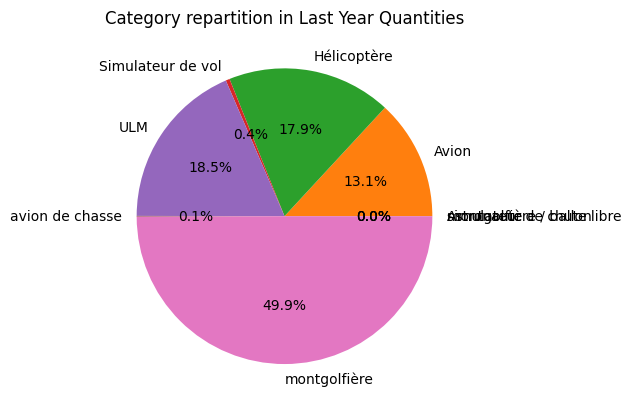

In [85]:
quantity_by_category = sales.groupby("Category")["Quantity"].sum()
quantity_by_category_last_year = sales.groupby("Category")["Quantity Last Year"].sum()
categories = quantity_by_category.keys()

print(quantity_by_category_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_category_last_year, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in Last Year Quantities")

### Categories Weight in this year's Quantities

Category
Astronaute                      0.0
montgolfière / ballon           0.0
simulateur de chute libre       0.0
avion de chasse                 3.0
Simulateur de vol              34.0
Avion                         582.0
ULM                          1034.0
Hélicoptère                  1188.0
montgolfière                 5369.0
Name: Quantity, dtype: float64


Text(0.5, 1.0, 'Category repartition in This Year Quantities')

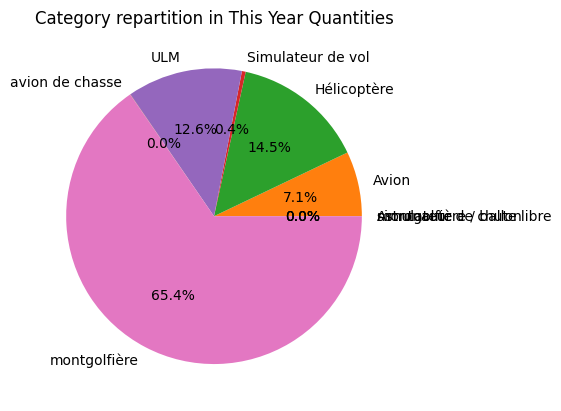

In [86]:
print(quantity_by_category.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_category, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in This Year Quantities")

### Quantities evolution by Category

Text(0.5, 1.0, 'Quantity sold by Category by Year')

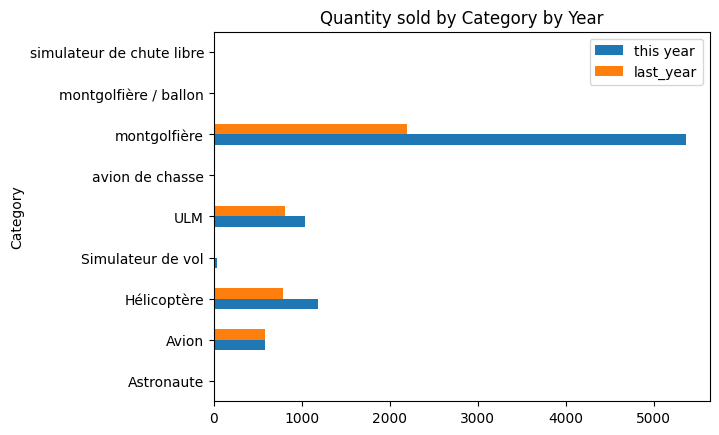

In [87]:
df = pd.DataFrame({"this year": quantity_by_category, "last_year":quantity_by_category_last_year}, index=categories)
ax = df.plot.barh()
ax.set_title("Quantity sold by Category by Year")

## --- Regions ---


### Regions Weight in last year's Sales

Region
Bretagne                        0.00
Franche-Comté                   0.00
Grand Est                       0.00
Pays de la Loire              782.92
Bourgogne-Franche-Comté      1494.83
hors france                  4790.83
Hauts-de-France              7935.17
Occitanie                   10929.57
PACA & Corse                12512.50
Paris & Île-de-France       23511.01
Normandie                   31604.17
Nouvelle-Aquitaine          34097.49
Auvergne-Rhône-Alpes        99454.25
Centre-Val de Loire        129761.34
France entière             473295.17
Name: Sales Last Year, dtype: float64


Text(0.5, 1.0, "Regions repartition in last year's Sales")

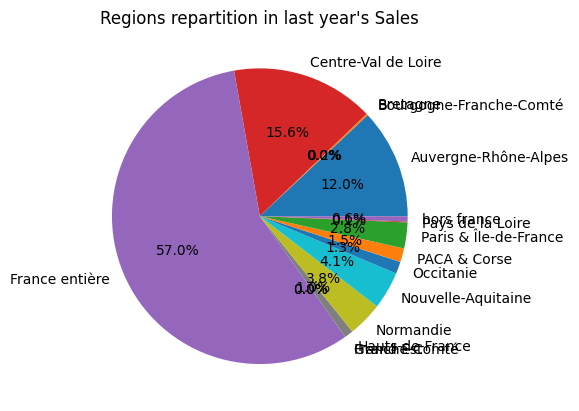

In [88]:
sales_by_region = sales.groupby("Region")["Sales"].sum()
sales_by_region_last_year = sales.groupby("Region")["Sales Last Year"].sum()
regions = sales_by_region.keys()

print(sales_by_region_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_region_last_year, labels=sales_by_region_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in last year's Sales")

Region
Franche-Comté                 998.20
hors france                  4047.99
Pays de la Loire             4695.01
Bretagne                     5007.68
PACA & Corse                12673.17
Grand Est                   18537.76
Hauts-de-France             22175.77
Occitanie                   27124.78
Normandie                   39126.36
Bourgogne-Franche-Comté     39540.09
Paris & Île-de-France       45698.93
Nouvelle-Aquitaine          48995.70
Auvergne-Rhône-Alpes       155318.22
Centre-Val de Loire        536574.16
France entière             676695.48
Name: Sales, dtype: float64


Text(0.5, 1.0, "Regions repartition in this year's Sales")

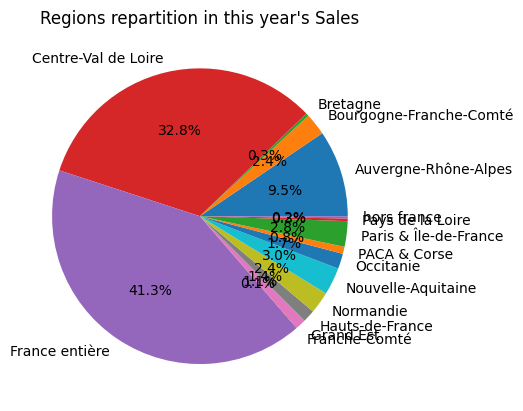

In [89]:
print(sales_by_region.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_region, labels=sales_by_region.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in this year's Sales")

Text(0.5, 1.0, 'Sales evolution by Region by Year')

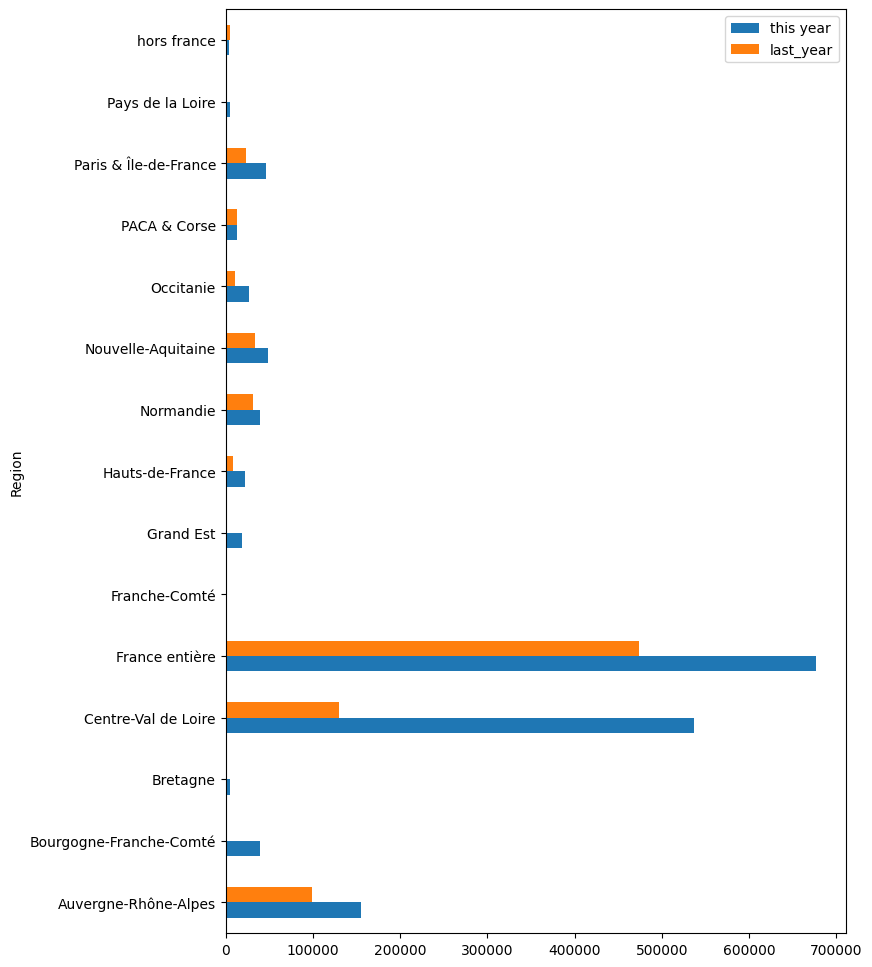

In [90]:
df = pd.DataFrame({"this year": sales_by_region, "last_year":sales_by_region_last_year}, index=regions)
df.plot.barh(figsize=(8,12))
ax.set_title("Sales evolution by Region by Year")

### Regions Weight in last year's Quantities sold

Region
Bretagne                      0.0
Franche-Comté                 0.0
Grand Est                     0.0
hors france                   2.0
Pays de la Loire              5.0
Bourgogne-Franche-Comté      11.0
Occitanie                    61.0
PACA & Corse                 66.0
Hauts-de-France             112.0
Paris & Île-de-France       180.0
Nouvelle-Aquitaine          217.0
Normandie                   252.0
Auvergne-Rhône-Alpes        419.0
Centre-Val de Loire         573.0
France entière             2509.0
Name: Quantity Last Year, dtype: float64


Text(0.5, 1.0, "Regions repartition in last year's Quantities")

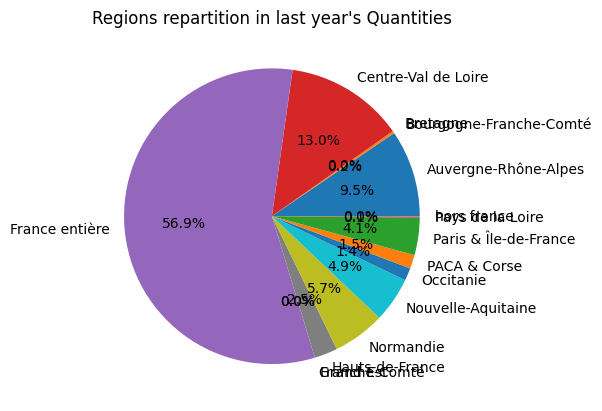

In [91]:
quantity_by_region = sales.groupby("Region")["Quantity"].sum()
quantity_by_region_last_year = sales.groupby("Region")["Quantity Last Year"].sum()
regions = quantity_by_region.keys()

print(quantity_by_region_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_region_last_year, labels=quantity_by_region_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in last year's Quantities")

### Regions Weight in this year's Quantities sold


Region
hors france                   3.0
Franche-Comté                 4.0
Bretagne                     31.0
Pays de la Loire             31.0
Grand Est                    65.0
PACA & Corse                 69.0
Occitanie                   105.0
Bourgogne-Franche-Comté     192.0
Nouvelle-Aquitaine          291.0
Normandie                   304.0
Hauts-de-France             310.0
Paris & Île-de-France       397.0
Auvergne-Rhône-Alpes        702.0
Centre-Val de Loire        2025.0
France entière             3681.0
Name: Quantity, dtype: float64


Text(0.5, 1.0, "Regions repartition in this year's Quantities")

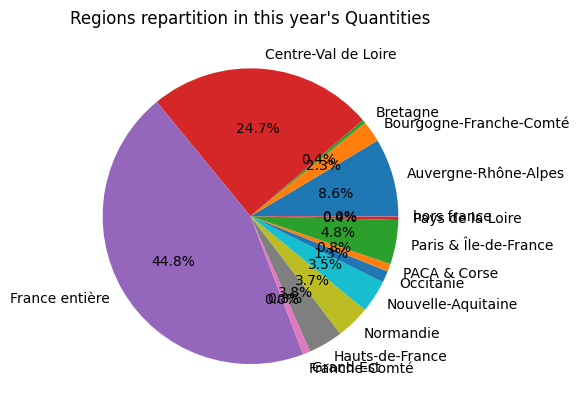

In [92]:
print(quantity_by_region.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_region, labels=quantity_by_region.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in this year's Quantities")

Text(0.5, 1.0, 'Quantities sold evolution by Region by Year')

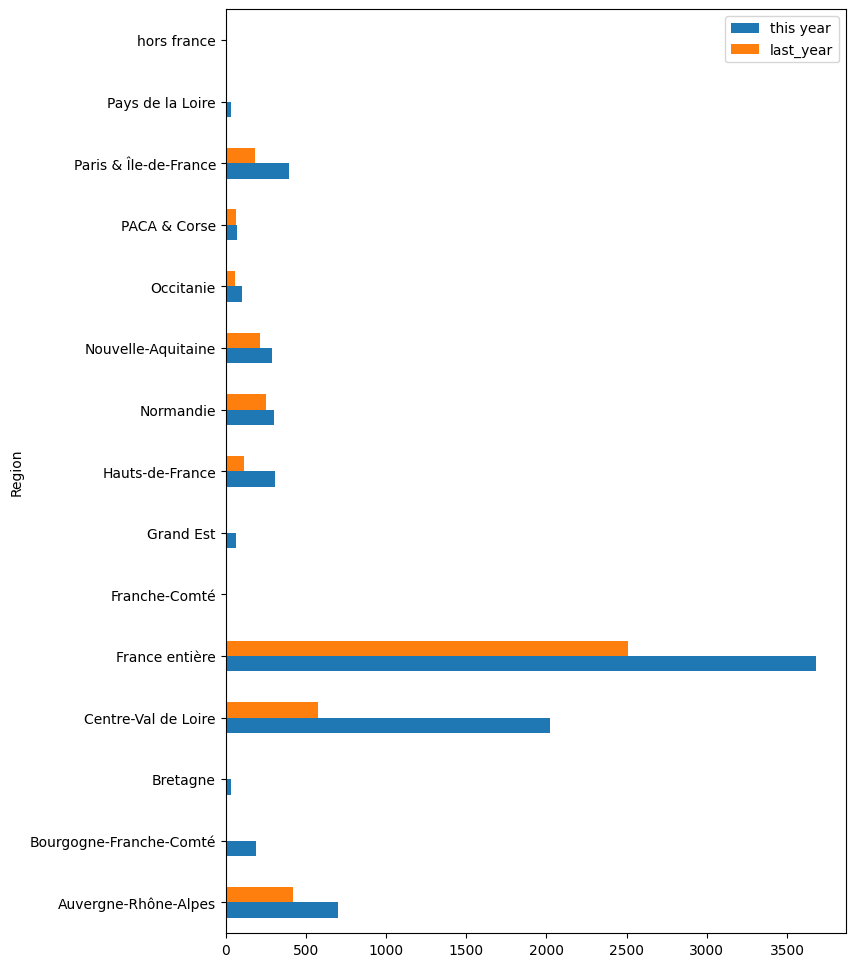

In [93]:
df = pd.DataFrame({"this year": quantity_by_region, "last_year":quantity_by_region_last_year}, index=regions)
df.plot.barh(figsize=(8,12))
ax.set_title("Quantities sold evolution by Region by Year")

## --- Duration ---